In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
pf=pd.read_csv('C:\My Download\data\diabetes 1st task\diabetes.csv')

In [3]:
pf.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Some Informations:

- Normal level of Glucose in blood is less than 140 (being between 140 and 199 indicates prediabetes).


- Normal Diastolic blood pressure is less than 80.


- If insulin levels were too high, it may mean she has: Type 2 diabetes .. If insulin levels were too low, it may mean she have: Type 1 diabetes.


- Insulin and glucose work together.


- BMI Categories:

      Underweight = <18.5
      Normal weight = 18.5–24.9
      Overweight = 25–29.9
      Obesity = BMI of 30 or greater.
    
    
- DiabetesPedigreeFunction is a function that determines the risk of type 2 diabetes based on family history, the larger the function, the higher the risk of diabetes.

In [4]:
pf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


- There are 768 rows

In [5]:
pf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


## Observations:

- FIRST - Some values can not be 0 like: Glucose, BloodPressure, SkinThickness, Insulin, BMI.
    

- SECOND - There may be outliers in cols: BloodPressure, SkinThickness, Insulin, BMI, DiabetesPedigreeFunction.

In [6]:
pf.groupby('Outcome').size()

Outcome
0    500
1    268
dtype: int64

- That means 500 of patiets don't have diabetes and 268 of them have.

array([[<AxesSubplot:title={'center':'Pregnancies'}>,
        <AxesSubplot:title={'center':'Glucose'}>,
        <AxesSubplot:title={'center':'BloodPressure'}>],
       [<AxesSubplot:title={'center':'SkinThickness'}>,
        <AxesSubplot:title={'center':'Insulin'}>,
        <AxesSubplot:title={'center':'BMI'}>],
       [<AxesSubplot:title={'center':'DiabetesPedigreeFunction'}>,
        <AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'Outcome'}>]], dtype=object)

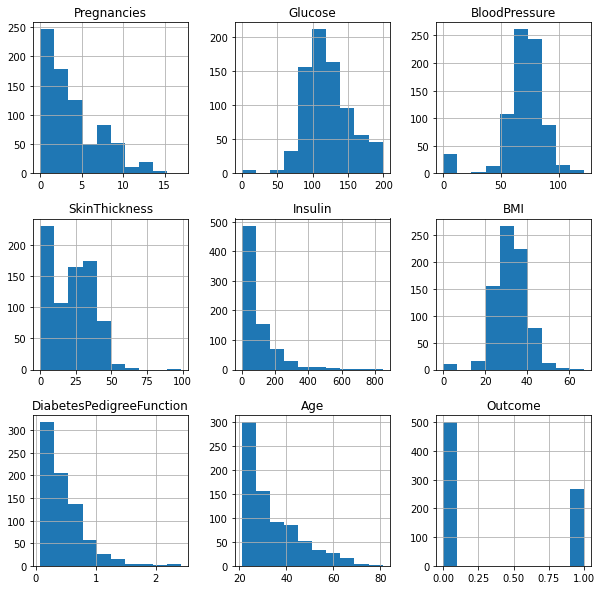

In [7]:
pf.hist(figsize=(10, 10))

## First - Cleanning Zeros:

In [8]:
#Number of rows with SkinThickness = 0  

len(pf[pf['SkinThickness']==0].index)

227

<AxesSubplot:>

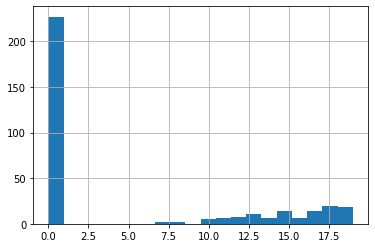

In [9]:
g = pf[pf['SkinThickness']<20]
g['SkinThickness'].hist(bins=20)

In [10]:
#Number of rows with Insulin = 0  

len(pf[pf['Insulin']==0].index)

374

<AxesSubplot:>

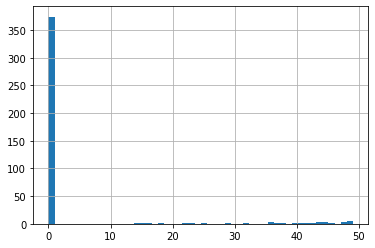

In [11]:
g = pf[pf['Insulin']<50]
g['Insulin'].hist(bins=50)

### Decision:

- There are 227 row with SkinThickness = 0,
  ######     So we will ignore SkinThickness.
 
 
- And There are 374 row with Insulin = 0,
  ######     So we will ignore Insulin.

In [12]:
pf[pf['Glucose']<44]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
75,1,0,48,20,0,24.7,0.140,22,0
182,1,0,74,20,23,27.7,0.299,21,0
342,1,0,68,35,0,32.0,0.389,22,0
349,5,0,80,32,0,41.0,0.346,37,1
502,6,0,68,41,0,39.0,0.727,41,1


<AxesSubplot:>

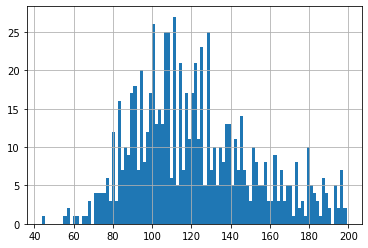

In [13]:
g=pf[pf['Glucose']>40]
g['Glucose'].hist(bins=100)

In [14]:
pf[pf['BloodPressure']<20]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
7,10,115,0,0,0,35.3,0.134,29,0
15,7,100,0,0,0,30.0,0.484,32,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
78,0,131,0,0,0,43.2,0.270,26,1
81,2,74,0,0,0,0.0,0.102,22,0
172,2,87,0,23,0,28.9,0.773,25,0
193,11,135,0,0,0,52.3,0.578,40,1
222,7,119,0,0,0,25.2,0.209,37,0
261,3,141,0,0,0,30.0,0.761,27,1


<AxesSubplot:>

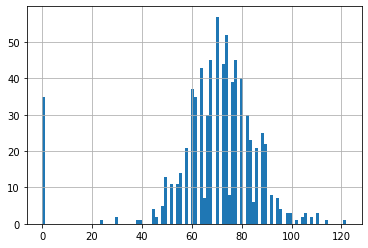

In [15]:
pf['BloodPressure'].hist(bins=100)

In [16]:
pf[pf['BMI']==0]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0
371,0,118,64,23,89,0.0,1.731,21,0
426,0,94,0,0,0,0.0,0.256,25,0
494,3,80,0,0,0,0.0,0.174,22,0
522,6,114,0,0,0,0.0,0.189,26,0
684,5,136,82,0,0,0.0,0.640,69,0


<AxesSubplot:>

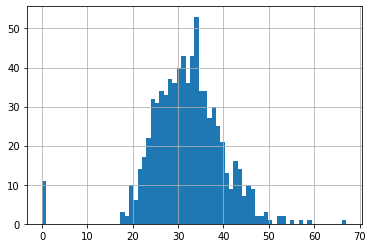

In [17]:
pf['BMI'].hist(bins=70)

### Decision:

- We will replace values of BMI = 0 with BMI median value.


- And will replace values of Glucose = 0 with Glucose median value.


- We will drop rows where BloodPressure = 0 which are 35 rows.

In [18]:
#Replace BMI Zero values with the median

pf.loc[pf['BMI']==0,'BMI'] = pf['BMI'].median()

In [19]:
#Replace Glucose Zero values with the median

pf.loc[pf['Glucose']==0,'Glucose'] = pf['Glucose'].median()

In [20]:
#Drop rows with Blood Pressure = 0 

pf.drop(pf[pf['BloodPressure'] < 20].index, inplace = True)

## Second - Cleanning Outliers:

In [21]:
pf.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000,733.000000
mean,3.855389,121.840382,72.405184,21.444748,83.609823,32.467394,0.475861,33.361528,0.343793
std,3.358106,30.576883,12.382158,15.705756,116.606997,6.866348,0.334179,11.837077,0.475297
min,0.000000,44.000000,24.000000,0.000000,0.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,100.000000,64.000000,0.000000,0.000000,27.500000,0.245000,24.000000,0.000000
50%,3.000000,117.000000,72.000000,24.000000,45.000000,32.300000,0.380000,29.000000,0.000000
75%,6.000000,141.000000,80.000000,33.000000,130.000000,36.600000,0.629000,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

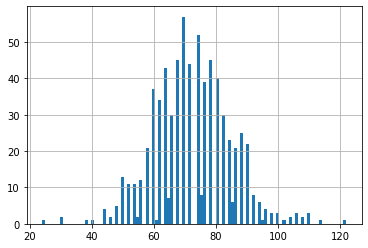

In [22]:
pf['BloodPressure'].hist(bins=100)

In [23]:
pf.drop(pf[pf['BloodPressure'] < 30].index, inplace = True)
pf.drop(pf[pf['BloodPressure'] >= 110].index, inplace = True)

- We dropped rows with Blood Pressure <30 or >110 because that was illogical

<AxesSubplot:>

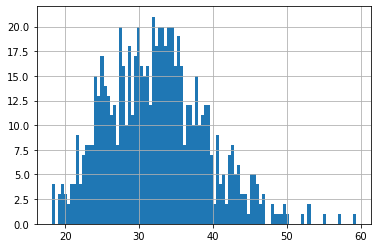

In [24]:
pf['BMI'].hist(bins=100)

In [25]:
pf[pf['BMI']>50]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
120,0,162.0,76,56,100,53.2,0.759,25,1
125,1,88.0,30,42,99,55.0,0.496,26,1
247,0,165.0,90,33,680,52.3,0.427,23,0
303,5,115.0,98,0,0,52.9,0.209,28,1
445,0,180.0,78,63,14,59.4,2.420,25,1
673,3,123.0,100,35,240,57.3,0.880,22,0


- We can notice that most patients of very high BMI Value have diabetes so we won't drop the rows.

<AxesSubplot:>

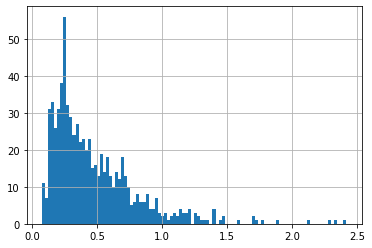

In [26]:
pf['DiabetesPedigreeFunction'].hist(bins=100)

In [27]:
pf[pf['DiabetesPedigreeFunction']>1.5]

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
4,0,137.0,40,35,168,43.1,2.288,33,1
45,0,180.0,66,39,0,42.0,1.893,25,1
58,0,146.0,82,0,0,40.5,1.781,44,0
228,4,197.0,70,39,744,36.7,2.329,31,0
370,3,173.0,82,48,465,38.4,2.137,25,1
371,0,118.0,64,23,89,32.0,1.731,21,0
395,2,127.0,58,24,275,27.7,1.600,25,0
445,0,180.0,78,63,14,59.4,2.420,25,1
593,2,82.0,52,22,115,28.5,1.699,25,0
621,2,92.0,76,20,0,24.2,1.698,28,0


- We won't change DiabetesPedigreeFunction 

-------------------------
---------------------

## Machine Learning - KNN

In [28]:
from sklearn.metrics import mean_absolute_error
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor

In [38]:
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score

In [30]:
# Create target object 
Y = pf.Outcome

# Create X
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age']
X = pf[features]

# Split into validation and training data
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=1)

In [39]:
sc_X= StandardScaler()
trainX = sc_X.fit_transform(train_X)
valX = sc_X.transform(val_X)

In [44]:
knn_model = KNeighborsClassifier(n_neighbors=22,p=2,metric='euclidean')

In [45]:
knn_model.fit(trainX,train_Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [49]:
pred_Y = knn_model.predict(valX)

In [51]:
print(confusion_matrix(val_Y,pred_Y))
print(f1_score(val_Y,pred_Y))

[[100  11]
 [ 41  30]]
0.5357142857142857


In [53]:
print(accuracy_score(val_Y,pred_Y))

0.7142857142857143


-------------------------------------------------

###### Try to add Insulin to the features:

In [56]:
pf.loc[pf['Insulin']==0,'Insulin']=pf['Insulin'].median()

In [57]:
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age','Insulin']
X = pf[features]

In [58]:
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=1)

In [59]:
sc_X= StandardScaler()
trainX = sc_X.fit_transform(train_X)
valX = sc_X.transform(val_X)

In [60]:
knn_model = KNeighborsClassifier(n_neighbors=22,p=2,metric='euclidean')

In [61]:
knn_model.fit(trainX,train_Y)

KNeighborsClassifier(metric='euclidean', n_neighbors=22)

In [62]:
pred_Y = knn_model.predict(valX)

In [63]:
print(confusion_matrix(val_Y,pred_Y))
print(f1_score(val_Y,pred_Y))

[[100  11]
 [ 40  31]]
0.5486725663716815


In [64]:
print(accuracy_score(val_Y,pred_Y))

0.7197802197802198


-------------------------------------------

###### Try to add SkinThickness also to the features:

In [66]:
pf.loc[pf['SkinThickness']==0,'SkinThickness']=pf['SkinThickness'].median()
features = ['Pregnancies', 'Glucose', 'BloodPressure', 'BMI', 'DiabetesPedigreeFunction', 'Age','Insulin','SkinThickness']
X = pf[features]
train_X, val_X, train_Y, val_Y = train_test_split(X, Y, random_state=1)
sc_X= StandardScaler()
trainX = sc_X.fit_transform(train_X)
valX = sc_X.transform(val_X)
knn_model = KNeighborsClassifier(n_neighbors=22,p=2,metric='euclidean')
knn_model.fit(trainX,train_Y)
pred_Y = knn_model.predict(valX)

In [67]:
print(confusion_matrix(val_Y,pred_Y))
print(f1_score(val_Y,pred_Y))

[[103   8]
 [ 40  31]]
0.5636363636363636


In [68]:
print(accuracy_score(val_Y,pred_Y))

0.7362637362637363


-----------------------------------